In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cd /content/drive/MyDrive/bda
!ls

drive  sample_data


In [3]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Define the paths for your training and testing data directories
train_dir = '/content/drive/MyDrive/bda/data_ck+48/train'
test_dir = '/content/drive/MyDrive/bda/data_ck+48/test'


In [5]:
# Define the VGG16 base model (pre-trained on ImageNet)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48,48, 3))

# Freeze the layers of the VGG16 model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the VGG16 base
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
output = Dense(7, activation='softmax')(x)  # Change num_classes to the number of classes in your dataset

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Set up data generators for training and testing
batch_size = 32
image_size = (48,48)

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=3, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=image_size, batch_size=batch_size, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=image_size, batch_size=batch_size, class_mode='categorical')

Found 679 images belonging to 7 classes.
Found 337 images belonging to 7 classes.


In [ ]:
epochs = 22# Adjust as needed
model.fit(train_generator, epochs=epochs, validation_data=test_generator)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

In [ ]:
# Checking the train and test loss and accuracy values from the neural network above.
import matplotlib.pyplot as plt
# Plot the accuracy over epochs
plt.plot(model.model['accuracy'], label='Training Accuracy')
plt.plot(model.model['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")


Found 679 images belonging to 7 classes.
Found 337 images belonging to 7 classes.
Epoch 1/14
22/22 [==============================] - 227s 10s/step - loss: 1.7282 - accuracy: 0.3711 - val_loss: 1.4888 - val_accuracy: 0.5074
Epoch 2/14
22/22 [==============================] - 3s 122ms/step - loss: 1.3551 - accuracy: 0.4978 - val_loss: 1.1590 - val_accuracy: 0.6795
Epoch 3/14
22/22 [==============================] - 3s 113ms/step - loss: 1.1587 - accuracy: 0.5626 - val_loss: 1.1020 - val_accuracy: 0.5816
Epoch 4/14
22/22 [==============================] - 2s 104ms/step - loss: 1.0296 - accuracy: 0.6362 - val_loss: 0.9938 - val_accuracy: 0.6825
Epoch 5/14
22/22 [==============================] - 2s 106ms/step - loss: 1.0210 - accuracy: 0.6333 - val_loss: 0.9650 - val_accuracy: 0.6944
Epoch 6/14
22/22 [==============================] - 2s 105ms/step - loss: 0.9330 - accuracy: 0.6627 - val_loss: 0.9332 - val_accuracy: 0.7211
Epoch 7/14
22/22 [==============================] - 2s 108ms/step 

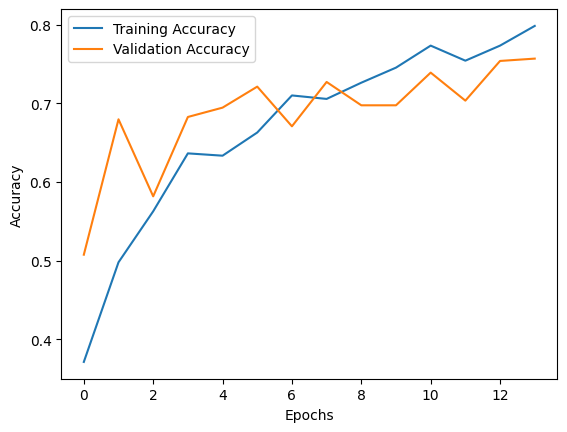

11/11 [==============================] - 1s 57ms/step - loss: 0.9594 - accuracy: 0.7567
Test accuracy: 0.7566765546798706


In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Define the paths for your training and testing data directories
train_dir = '/content/drive/MyDrive/bda/data_ck+48/train'
test_dir = '/content/drive/MyDrive/bda/data_ck+48/test'

# Define the VGG16 base model (pre-trained on ImageNet)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48,48, 3))

# Freeze the layers of the VGG16 model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the VGG16 base
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
output = Dense(7, activation='softmax')(x)  # Change num_classes to the number of classes in your dataset

model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up data generators for training and testing
batch_size = 32
image_size = (48,48)

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=3, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=image_size, batch_size=batch_size, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=image_size, batch_size=batch_size, class_mode='categorical')

# Train the model
epochs = 14
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)

# Plot the accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")
